## Regression visaulization

###Чтение csv

In [ ]:
df = pd.read_csv(pathName + 'vw.csv') #, sep=";") #Загружаем данные в data frame
#df = df.iloc[::2,:] #Выбираем нечётные строки, в чётных строках в исходном фрейме пустые строки для комментариев
#data = df.values #Вытаскиваем данные в numpy array

In [ ]:
df.head(2) #Показываем пример данных (первые 6 колонок)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0


### Анализ данных

#### Анализ данных Step 1: Reading and Understanding the Data

по примеру https://www.kaggle.com/goyalshalini93/car-price-prediction-linear-regression-rfe

In [ ]:
df.shape

(15157, 9)

In [ ]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000
mean,2017.255789,16838.952365,22092.785644,112.744277,53.753355,1.600693
std,2.053059,7755.015206,21148.941635,63.482617,13.642182,0.461695
min,2000.000000,899.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10990.000000,5962.000000,30.000000,46.300000,1.200000
50%,2017.000000,15497.000000,16393.000000,145.000000,53.300000,1.600000
75%,2019.000000,20998.000000,31824.000000,145.000000,60.100000,2.000000
max,2020.000000,69994.000000,212000.000000,580.000000,188.300000,3.200000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15157 entries, 0 to 15156
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         15157 non-null  object 
 1   year          15157 non-null  int64  
 2   price         15157 non-null  int64  
 3   transmission  15157 non-null  object 
 4   mileage       15157 non-null  int64  
 5   fuelType      15157 non-null  object 
 6   tax           15157 non-null  int64  
 7   mpg           15157 non-null  float64
 8   engineSize    15157 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.0+ MB


#### Step 2 : Data Cleaning and Preparation

In [ ]:
# пример раздеения колонок, но нам не надо
#Splitting company name from CarName column
#CompanyName = cars['CarName'].apply(lambda x : x.split(' ')[0])
#cars.insert(3,"CompanyName",CompanyName)
#cars.drop(['CarName'],axis=1,inplace=True)
#cars.head()

In [ ]:
print("Пустых значений в колонках:")
df.isnull().sum(axis = 0)

Пустых значений в колонках:


model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [ ]:
print("Пустых значений в строках:")
df.isnull().sum(axis = 1)

Пустых значений в строках:


0        0
1        0
2        0
3        0
4        0
        ..
15152    0
15153    0
15154    0
15155    0
15156    0
Length: 15157, dtype: int64

In [ ]:
# проверяем наличие дубликатов #Checking for duplicates
df.loc[df.duplicated()]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
40,T-Roc,2018,18695,Manual,6753,Petrol,145,53.3,1.5
45,T-Roc,2018,17995,Manual,14837,Petrol,145,53.3,1.5
46,T-Roc,2018,17995,Manual,14337,Petrol,145,53.3,1.5
48,T-Roc,2019,22230,Manual,3392,Diesel,145,50.4,2.0
61,T-Roc,2019,25990,Semi-Auto,2423,Diesel,145,49.6,2.0
...,...,...,...,...,...,...,...,...,...
14477,Golf SV,2019,19360,Semi-Auto,4401,Diesel,145,50.4,2.0
14495,Golf SV,2019,22798,Manual,10,Petrol,145,43.5,1.5
14498,Golf SV,2019,23998,Semi-Auto,10,Diesel,145,50.4,2.0
14499,Golf SV,2019,21998,Semi-Auto,10,Petrol,145,42.8,1.5


In [ ]:
# Удаляем дупликаты
df2 = df
df = df.drop_duplicates()
print(df.shape, df2.shape)

(14893, 9) (15157, 9)


In [ ]:
data = df1.values #Вытаскиваем данные в numpy array

##### Смотрим, что можно категоризировать

In [ ]:
total_len =0
#0
print("0-model", len(df.model.unique().tolist()))
print(df.model.unique().tolist())
total_len += len(df.model.unique().tolist())
#1
print("1-year",len(df.year.unique().tolist()))
print(df.year.unique().tolist())
total_len += len(df.year.unique().tolist())
#2
print("2-price", len(df.price.unique().tolist()))
print(df.price.unique().tolist()[:20])

#3
print("3-transmission", len(df.transmission.unique().tolist()))
print(df.transmission.unique().tolist())
total_len += len(df.transmission.unique().tolist())
#4
print("4-mileage",len(df.mileage.unique().tolist()))
print(df.mileage.unique().tolist()[:20])

#5
print("5-fuelType",len(df.fuelType.unique().tolist()))
print(df.fuelType.unique().tolist())
total_len += len(df.fuelType.unique().tolist())
#6
print("6-tax",len(df.tax.unique().tolist()))
print(df.tax.unique().tolist())
total_len += len(df.tax.unique().tolist())
#7
print("7-mpg",len(df.mpg.unique().tolist()))
print(df.mpg.unique().tolist())
total_len += len(df.mpg.unique().tolist())
#8
print("8-engineSize",len(df.engineSize.unique().tolist()))
print(df.engineSize.unique().tolist())
total_len += len(df.engineSize.unique().tolist())
print("total_len", total_len)

0-model 27
[' T-Roc', ' Golf', ' Passat', ' T-Cross', ' Polo', ' Tiguan', ' Sharan', ' Up', ' Scirocco', ' Beetle', ' Caddy Maxi Life', ' Caravelle', ' Touareg', ' Arteon', ' Touran', ' Golf SV', ' Amarok', ' Tiguan Allspace', ' Shuttle', ' Jetta', ' CC', ' California', ' Caddy Life', ' Caddy', ' Caddy Maxi', ' Eos', ' Fox']
1-year 21
[2019, 2020, 2018, 2017, 2015, 2016, 2013, 2014, 2009, 2010, 2004, 2003, 2012, 2011, 2008, 2000, 2006, 2002, 2005, 2007, 2001]
2-price 3970
[25000, 26883, 20000, 33492, 22900, 31895, 27895, 39495, 21995, 23285, 23985, 23585, 25785, 23995, 17495, 21495, 18995, 33785, 23790, 19995]
3-transmission 3
['Automatic', 'Manual', 'Semi-Auto']
4-mileage 10760
[13904, 4562, 7414, 4825, 6500, 10, 1069, 21645, 16972, 15100, 1380, 2500, 5000, 12300, 5540, 3500, 16251, 5127, 22584, 1955]
5-fuelType 4
['Diesel', 'Petrol', 'Other', 'Hybrid']
6-tax 32
[145, 150, 0, 200, 20, 30, 235, 125, 205, 165, 325, 300, 160, 135, 140, 260, 265, 245, 240, 280, 305, 570, 190, 220, 155, 55

#### Step 3: Visualizing the data

##### Intro

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


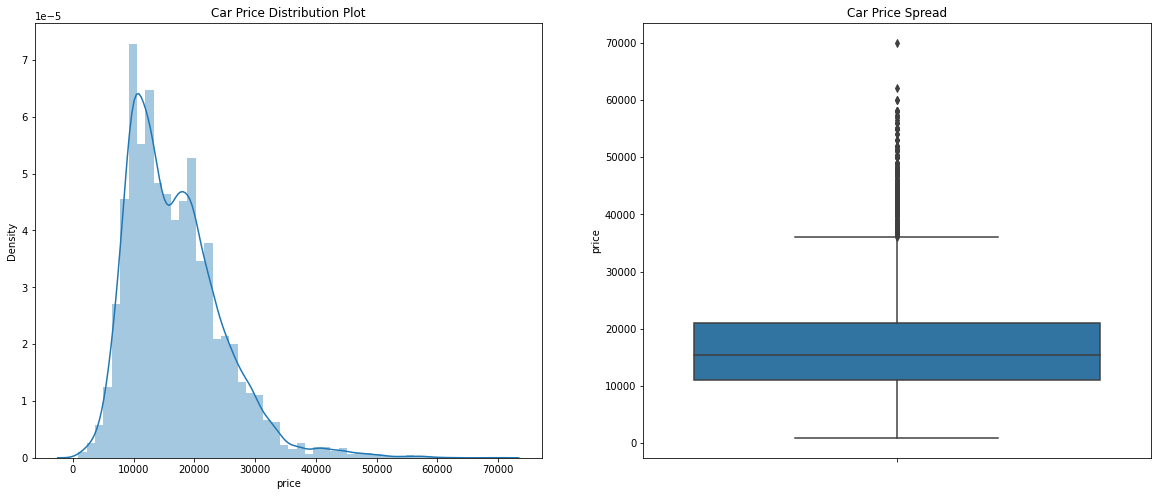

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df.price)

plt.show()

In [ ]:
print(df.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count    14893.000000
mean     16807.898073
std       7735.548874
min        899.000000
25%      10990.000000
50%      15494.000000
75%      20995.000000
85%      24396.000000
90%      26989.000000
100%     69994.000000
max      69994.000000
Name: price, dtype: float64


##### Выводы (Inference):

1. Большинство цен в датасете низкие (меньше 24 000)
2. There is a significant difference between the mean and the median of the price distribution.
3. Точки данных далеко разбросаны от среднего значения, что указывает на высокую дисперсию цен на автомобили.(85% цен ниже 24 500, в то время как остальные 15% находятся между 24 500 и 70 000.)


##### Step 3.1 : Visualising Categorical Data

In [ ]:
print(df.columns.tolist()) #Показываем имена колонок данных, к-ые мы будем использовать
#['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']

['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']


###### Смотрим 
'model', 'year','transmission',
 'fuelType', 'tax', 'mpg', 'engineSize'

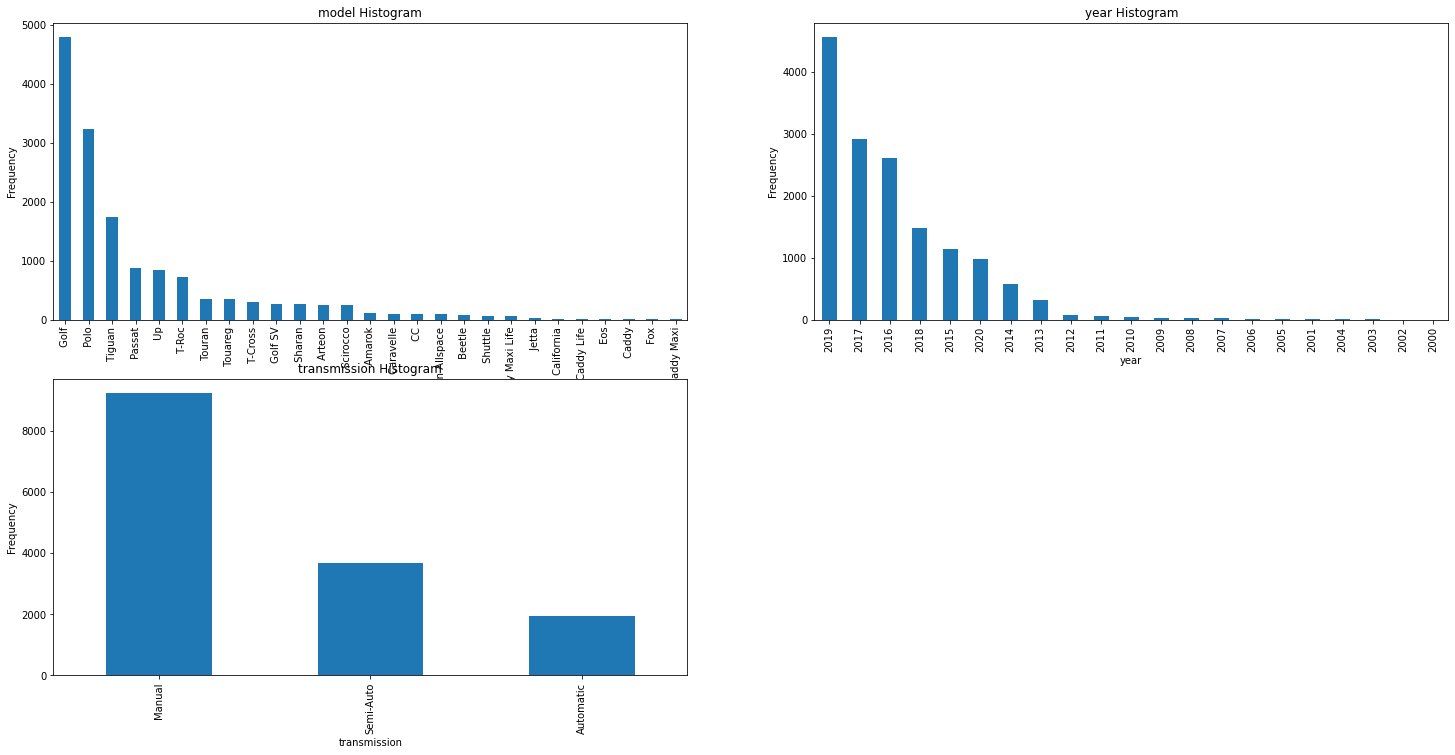

In [ ]:
plt.figure(figsize=(25, 12))

plt.subplot(2,2,1)
#plt1 = df.model.value_counts().plot('bar')
plt1 = df.model.value_counts().plot(kind='bar')
plt.title('model Histogram')
plt1.set(xlabel = 'model', ylabel='Frequency')

plt.subplot(2,2,2)
#plt1 = df.year.value_counts().plot('bar')
plt1 = df.year.value_counts().plot(kind='bar')
plt.title('year Histogram')
plt1.set(xlabel = 'year', ylabel='Frequency')

plt.subplot(2,2,3)
plt1 = df.transmission.value_counts().plot(kind='bar')
plt.title('transmission Histogram')
plt1.set(xlabel = 'transmission', ylabel='Frequency')

plt.show()

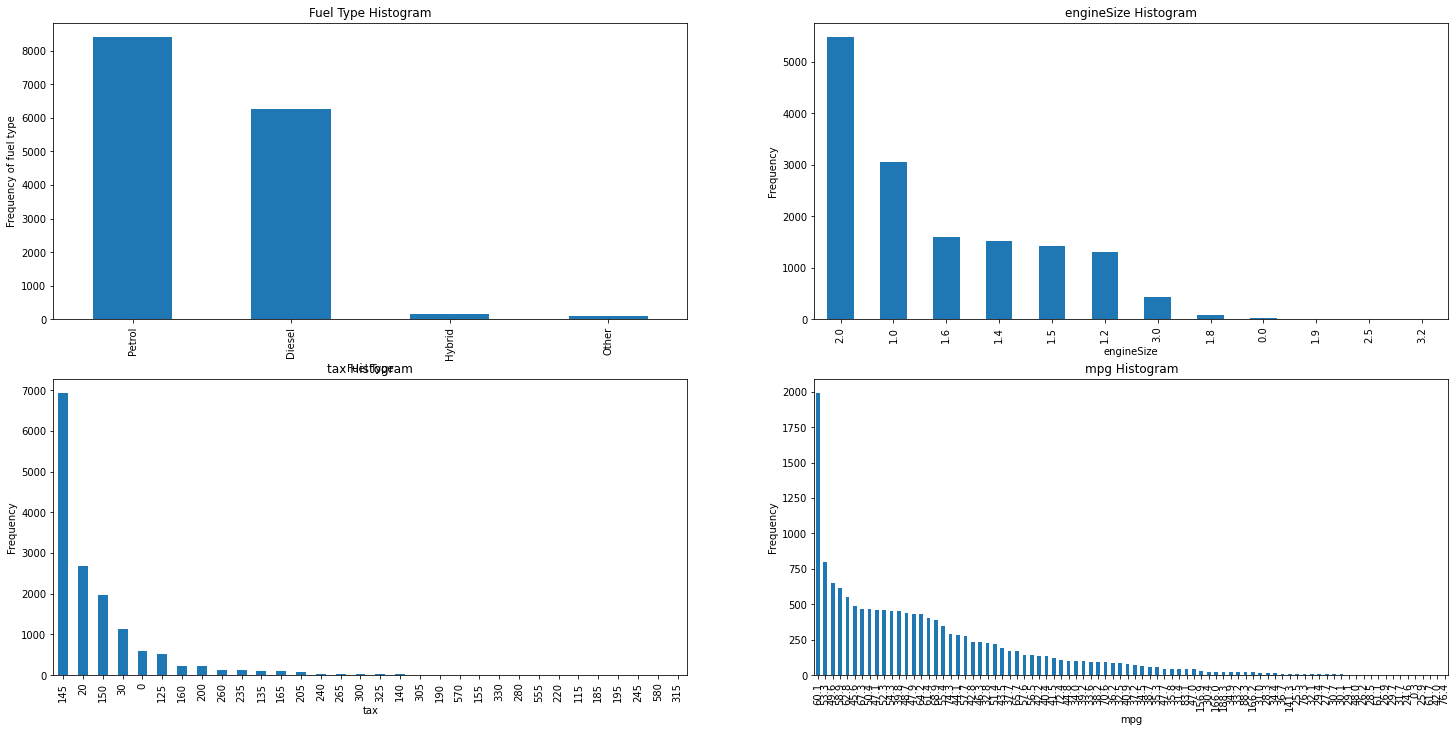

In [ ]:
#['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']
plt.figure(figsize=(25, 12))

plt.subplot(2,2,1)
plt1 = df.fuelType.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(2,2,2)
plt1 = df.engineSize.value_counts().plot(kind='bar')
plt.title('engineSize Histogram')
plt1.set(xlabel = 'engineSize', ylabel='Frequency')

#plt.show()
#plt.figure(figsize=(25, 6))
plt.subplot(2,2,3)
plt1 = df.tax.value_counts().plot(kind='bar')
plt.title('tax Histogram')
plt1.set(xlabel = 'tax', ylabel='Frequency')


plt.subplot(2,2,4)
plt1 = df.mpg.value_counts().plot(kind='bar')
plt.title('mpg Histogram')
plt1.set(xlabel = 'mpg', ylabel='Frequency')

plt.show()


###### Выводы (Inference):

1. Больше машин 
- на бензине и дизеле
- Golf, Polo, Tiguan
- 2019, 2017, 2016 гг
- engineSize 2.0, 1.0
- tax 145


#### boxplots, histograms

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


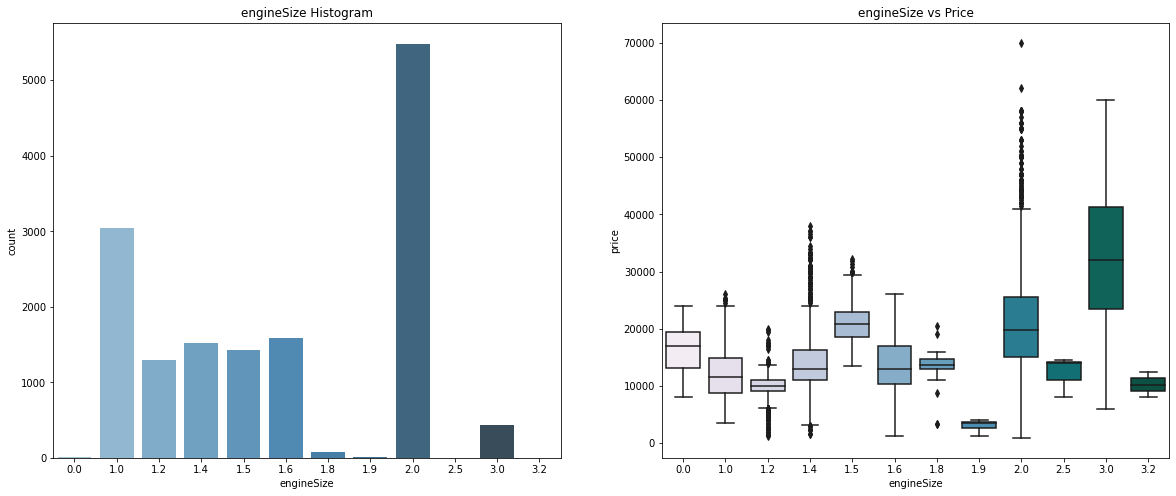

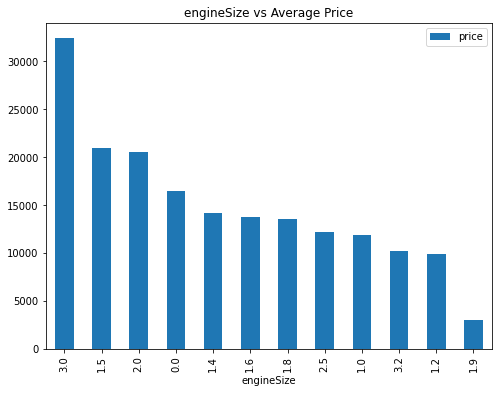

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('engineSize Histogram')
sns.countplot(df.engineSize, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('engineSize vs Price')
sns.boxplot(x=df.engineSize, y=df.price, palette=("PuBuGn"))
#FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.  FutureWarning
#sns.boxplot(df.engineSize, df.price, palette=("PuBuGn"))

plt.show()

df3 = pd.DataFrame(df.groupby(['engineSize'])['price'].mean().sort_values(ascending = False))
df3.plot.bar(figsize=(8,6))
plt.title('engineSize vs Average Price')
plt.show()


##### Выводы (Inference):

1. Наиболее популярны машины с двигателем 2л
2. engineSize =3.0 имеет самый высокий ценовой диапазон 
3. engineSize =1.9, 1.0, 1.2 имеют самый низкий ценовой диапазон.


##### Step 3.2 : Visualising numerical data

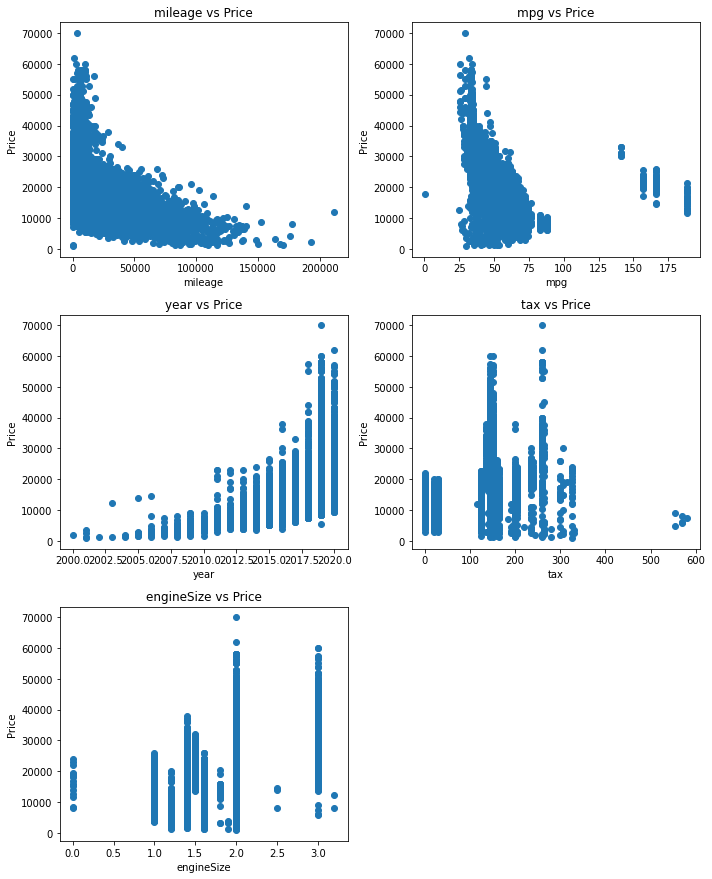

In [ ]:
#['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('mileage', 1)
scatter('mpg', 2) # посмотрим на MPG и как на числовые данные
scatter('year', 3)
scatter('tax', 4)
scatter('engineSize', 5)

plt.tight_layout()

##### Выводы (Inference):

1. mileage  показывает значимую негативную корреляцию с price (чем болье покзатель тем меньше цена)
2. year показывает значимую полжительную корреляцию с price (чем больше год (свежее машина) тем больше цена
3. меньшая корреляция с price - tax и engineSize - по диапазнам (не совсем разбросана по графику)
4. у машин всех ценовых диапазнов - примерно один MPG 50 highwaympg - возможно показывает уровень технологий - 4,75 л на 100 км

##### Делаем анализ с помощью Seaborn

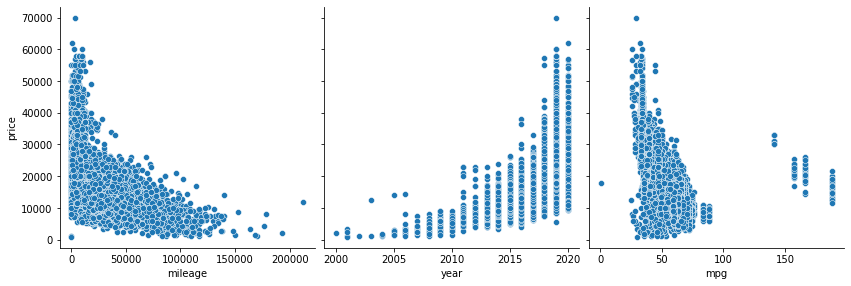

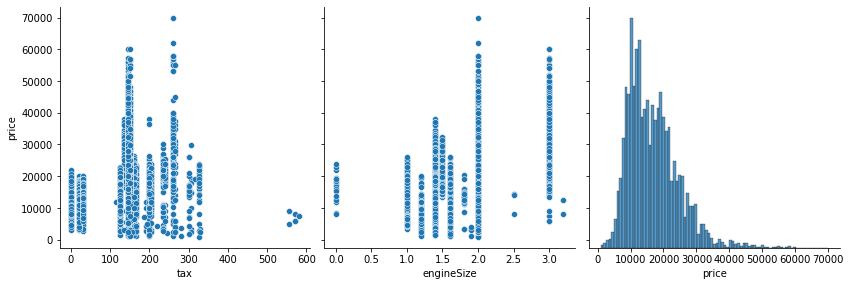

In [ ]:
# то же через seaborn
def pp(x,y,z):
    #sns.pairplot(df, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    sns.pairplot(df, x_vars=[x,y,z], y_vars='price',height=4, aspect=1, kind='scatter')
    plt.show()

pp('mileage', 'year', 'mpg')
pp('tax', 'engineSize', 'price')



##### List of significant variables after Visual analysis :
1. негативно: 
- mileage
2. позитивно: (свежий (больший) год ->  больше цена)
- year 
3. диапазонно связаны:
- engineSize
- tax 
4. под вопросом
- mpg - т.е. сделаем выборку обучающую с ним и без него и посмотрим как влияет ан точность модели

In [ ]:
df_lr = df[['price', 'model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']]
df_lr.head()

,price,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,25000,T-Roc,2019,Automatic,13904,Diesel,145,49.6,2.0
1,26883,T-Roc,2019,Automatic,4562,Diesel,145,49.6,2.0
2,20000,T-Roc,2019,Manual,7414,Diesel,145,50.4,2.0
3,33492,T-Roc,2019,Automatic,4825,Petrol,145,32.5,2.0
4,22900,T-Roc,2019,Semi-Auto,6500,Petrol,150,39.8,1.5


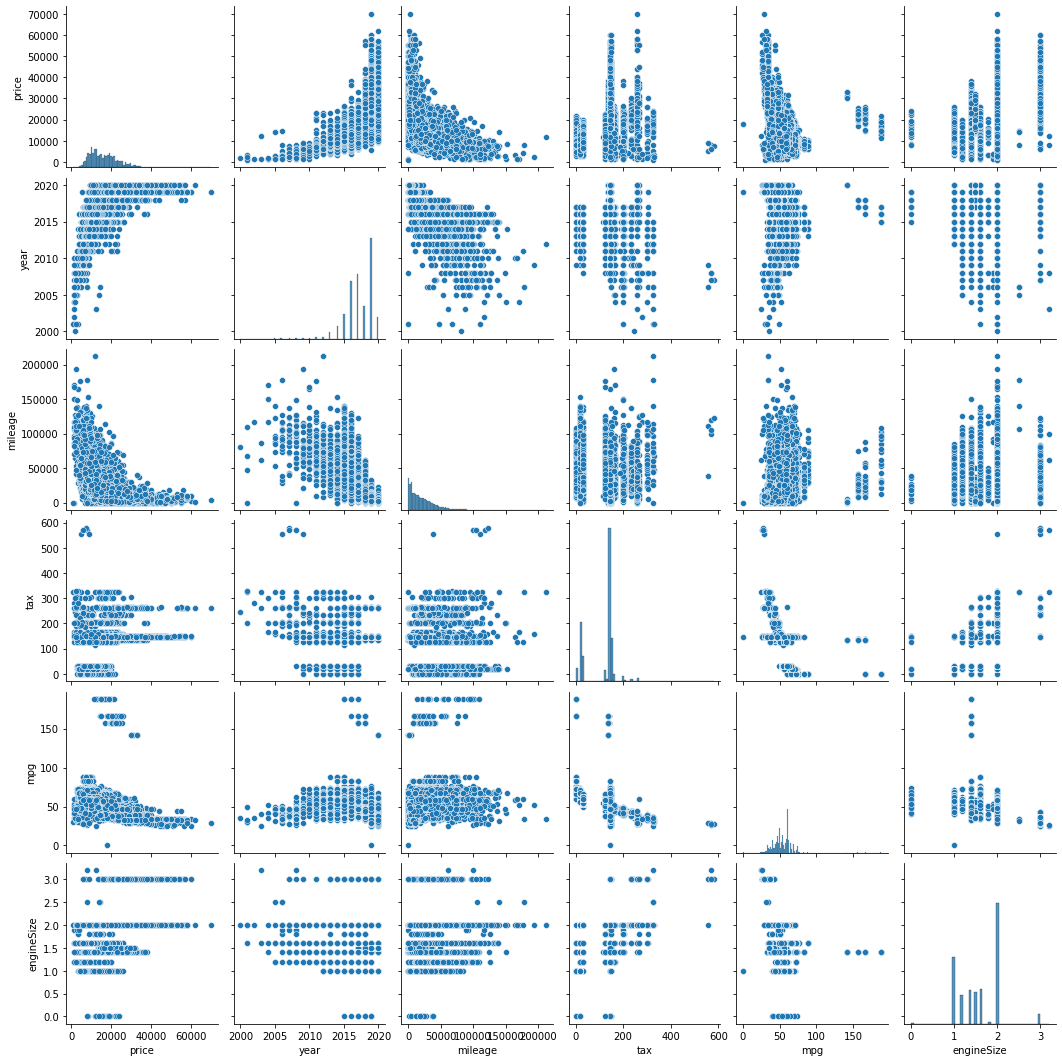

In [ ]:
# пока просто повторяю
sns.pairplot(df_lr)
plt.show()

#### Step 6 : Dummy Variables 
- не прошел из-за большого объема данных - 10 млрд - в примере было 1 млн

In [ ]:
df_lr.columns #['year']

Index(['price', 'model', 'year', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [ ]:
# Defining the map function
#['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    #print(x, temp)
    df = pd.concat([df, temp], axis = 1)
    #print(x, df)
    #df.drop([x], axis = 1, inplace = True) # &?????????
    return df
# Applying the function to the cars_lr

#df_lr = dummies('price',df_lr)

df_lr = dummies('year',df_lr)
df_lr = dummies('mileage',df_lr)
df_lr = dummies('mpg',df_lr)
df_lr = dummies('tax',df_lr)
df_lr = dummies('engineSize',df_lr)

#df_lr = dummies('fuelType',df_lr)
#df_lr = dummies('model',df_lr)
#df_lr = dummies('transmission',df_lr)

In [ ]:
x = 'year'
temp = pd.get_dummies(df_lr[x], drop_first = True)
#df_lr = pd.concat([df_lr, temp], axis = 1)
#df_lr.drop([x], axis = 1, inplace = True)
print(df_lr.shape)
print(temp.shape)
df_lr.head()
temp.head()

(14893, 9)
(14893, 20)


,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
df_lr = pd.concat([df_lr, temp], axis = 1)
#df_lr = pd.concat([df_lr, temp], axis = 0)
#df_lr.drop([x], axis = 1, inplace = True)
print(df_lr.shape)
print(temp.shape)
df_lr.head()

(14893, 29)
(14893, 20)


,price,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,25000,T-Roc,2019,Automatic,13904,Diesel,145,49.6,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,26883,T-Roc,2019,Automatic,4562,Diesel,145,49.6,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,20000,T-Roc,2019,Manual,7414,Diesel,145,50.4,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,33492,T-Roc,2019,Automatic,4825,Petrol,145,32.5,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,22900,T-Roc,2019,Semi-Auto,6500,Petrol,150,39.8,1.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
df_lr.drop([x], axis = 1, inplace = True)
print(df_lr.shape)
print(temp.shape)
df_lr.head()


(14893, 28)
(14893, 20)


,price,model,transmission,mileage,fuelType,tax,mpg,engineSize,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,25000,T-Roc,Automatic,13904,Diesel,145,49.6,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,26883,T-Roc,Automatic,4562,Diesel,145,49.6,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,20000,T-Roc,Manual,7414,Diesel,145,50.4,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,33492,T-Roc,Automatic,4825,Petrol,145,32.5,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,22900,T-Roc,Semi-Auto,6500,Petrol,150,39.8,1.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
df_lr.tail()

,price,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,...,580,1.0,1.2,1.4,1.5,1.6,1.8,1.9,2.0,2.5,3.0,3.2,Arteon,Beetle,CC,Caddy,Caddy Life,Caddy Maxi,Caddy Maxi Life,California,Caravelle,Eos,Fox,Golf,Golf SV,Jetta,Passat,Polo,Scirocco,Sharan,Shuttle,T-Cross,T-Roc,Tiguan,Tiguan Allspace,Touareg,Touran,Up,Manual,Semi-Auto
15152,5990,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
15153,1799,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
15154,1590,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
15155,1250,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
15156,2295,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
df_lr.head()

,price,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2,4,5,6,7,8,9,10,11,12,13,...,115,125,135,140,145,150,155,160,165,185,190,195,200,205,220,235,240,245,260,265,280,300,305,315,325,330,555,570,580,1.0,1.2,1.4,1.5,1.6,1.8,1.9,2.0,2.5,3.0,3.2
0,25000,T-Roc,2019,Automatic,13904,Diesel,145,49.6,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,26883,T-Roc,2019,Automatic,4562,Diesel,145,49.6,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,20000,T-Roc,2019,Manual,7414,Diesel,145,50.4,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,33492,T-Roc,2019,Automatic,4825,Petrol,145,32.5,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,22900,T-Roc,2019,Semi-Auto,6500,Petrol,150,39.8,1.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
df_lr.shape

(14893, 10938)

#####Step 7 : Train-Test Split and feature scaling
- не прошел из-за большого объема данных - 10 млрд - в примере было 1 млн

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
#['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']
num_vars = [ 'mpg', 'tax','engineSize','mileage','year','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [ ]:
df_train.head()

,price,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2,4,5,6,7,8,9,10,11,12,13,...,115,125,135,140,145,150,155,160,165,185,190,195,200,205,220,235,240,245,260,265,280,300,305,315,325,330,555,570,580,1.0,1.2,1.4,1.5,1.6,1.8,1.9,2.0,2.5,3.0,3.2
807,0.163622,Golf,0.75,Semi-Auto,0.345969,Diesel,0.051724,0.332447,0.62500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3927,0.272606,Golf,0.95,Semi-Auto,0.039887,Petrol,0.250000,0.240957,0.46875,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6840,0.141758,Polo,0.85,Manual,0.042661,Petrol,0.034483,0.318085,0.31250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1523,0.217444,Golf,0.95,Manual,0.007995,Petrol,0.250000,0.262234,0.31250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
12545,0.101842,Up,0.80,Manual,0.044316,Petrol,0.034483,0.339894,0.31250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_train.describe()

,price,year,mileage,tax,mpg,engineSize,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2,4,5,6,7,8,9,10,11,12,13,14,15,16,...,115,125,135,140,145,150,155,160,165,185,190,195,200,205,220,235,240,245,260,265,280,300,305,315,325,330,555,570,580,1.0,1.2,1.4,1.5,1.6,1.8,1.9,2.0,2.5,3.0,3.2
count,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.00000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,...,10425.0,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.0,10425.000000,10425.0,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.0,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000,10425.000000
mean,0.226729,0.861918,0.105169,0.192991,0.284766,0.50149,0.000192,0.000096,0.000096,0.000288,0.000288,0.001151,0.001151,0.001918,0.001823,0.003070,0.003741,0.005084,0.020336,0.039616,0.076547,0.178034,0.195971,0.095540,0.310695,0.064269,0.000096,0.000480,0.001151,0.000288,0.000096,0.000576,0.000288,0.009688,0.000767,0.000480,0.000192,0.000192,0.001918,0.000096,...,0.0,0.034820,0.006715,0.000863,0.468681,0.125851,0.000192,0.015444,0.006139,0.0,0.000288,0.0,0.014484,0.004988,0.000096,0.007482,0.001247,0.000096,0.008537,0.001727,0.000192,0.001631,0.000671,0.0,0.001343,0.000096,0.000096,0.000288,0.000096,0.200288,0.087386,0.102446,0.095827,0.107818,0.005180,0.000192,0.369976,0.000192,0.029736,0.000192
std,0.113434,0.102132,0.100130,0.110057,0.073459,0.14370,0.013850,0.009794,0.009794,0.016962,0.016962,0.033910,0.033910,0.043760,0.042654,0.055321,0.061052,0.071124,0.141153,0.195065,0.265884,0.382559,0.396966,0.293973,0.462801,0.245243,0.009794,0.021896,0.033910,0.016962,0.009794,0.023985,0.016962,0.097956,0.027692,0.021896,0.013850,0.013850,0.043760,0.009794,...,0.0,0.183333,0.081671,0.029371,0.499042,0.331698,0.013850,0.123315,0.078115,0.0,0.016962,0.0,0.119482,0.070453,0.009794,0.086179,0.035293,0.009794,0.092006,0.041519,0.013850,0.040351,0.025905,0.0,0.036623,0.009794,0.009794,0.016962,0.009794,0.400235,0.282414,0.303249,0.294368,0.310165,0.071788,0.013850,0.482821,0.013850,0.169867,0.013850
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.141671,0.800000,0.028297,0.051724,0.244681,0.37500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [ ]:
#Correlation using heatmap - не прошел из-за большого объема данных - 10 млрд - в примере было 1 млн
cur_time = time.time()
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()
print("время формирования: {:f.2} c".format(time.time() - cur_time)

#### Выводы

1. Highly correlated variables to price are 
- curbweight
- enginesize 
- horsepower
- carwidth 
- highend

In [ ]:
#Dividing data into X and y variables
y_train = df_train.pop('price')
X_train = df_train